# Third Phase Evaluation Project - Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding = 'latin')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df1.shape

(9551, 21)

In [4]:
df2 = pd.read_excel(r"C:\Users\hp\Downloads\Country-Code.xlsx")
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
df2.shape

(15, 2)

In [6]:
Df = pd.merge(df1,df2)
Df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [7]:
Df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
for a in Df.columns:
    unique_val = Df[a].nunique()
    print(f"Column: {a}")
    print(unique_val)
    print('\n')

Column: Restaurant ID
9551


Column: Restaurant Name
7446


Column: Country Code
15


Column: City
141


Column: Address
8918


Column: Locality
1208


Column: Locality Verbose
1265


Column: Longitude
8120


Column: Latitude
8677


Column: Cuisines
1825


Column: Average Cost for two
140


Column: Currency
12


Column: Has Table booking
2


Column: Has Online delivery
2


Column: Is delivering now
2


Column: Switch to order menu
1


Column: Price range
4


Column: Aggregate rating
33


Column: Rating color
6


Column: Rating text
6


Column: Votes
1012


Column: Country
15




In [9]:
for v in Df.columns:
    values = Df[v].value_counts()
    print(f"Column: {v}")
    print(values)
    print('\n')

Column: Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Column: Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


Column: Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


Column: City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
   

In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Here, we can see there is very few null values present in the Cuisines.

In [11]:
Df['Cuisines'].fillna(Df['Cuisines'].mode()[0], inplace=True)

In [12]:
Df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

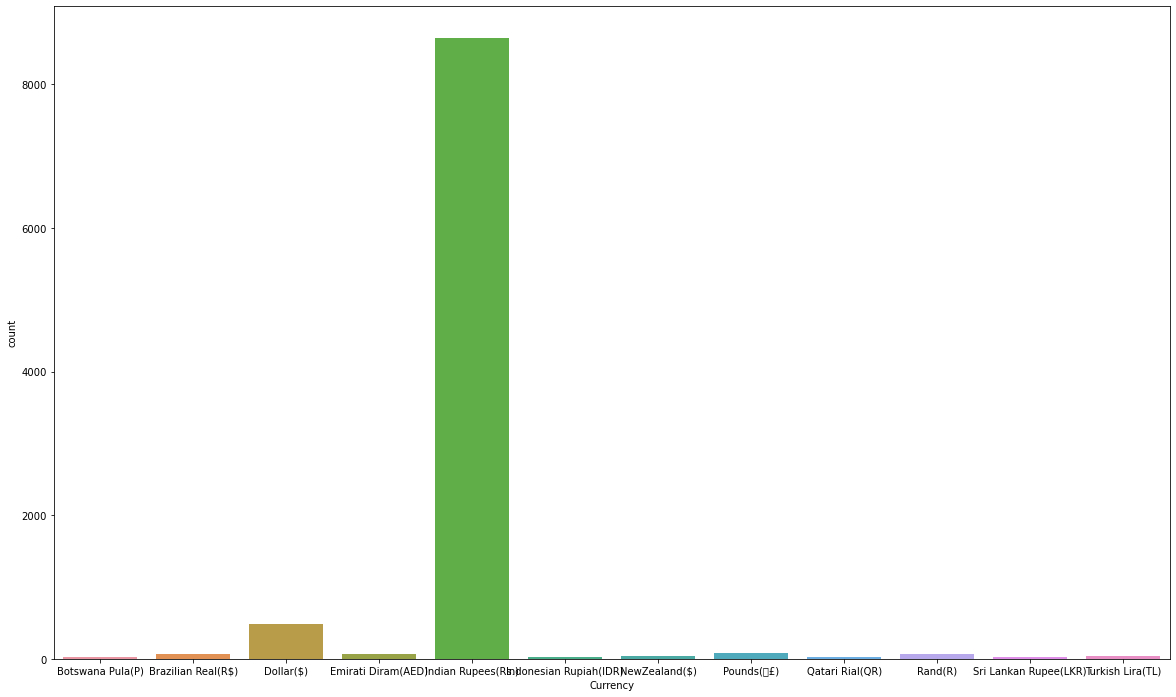

In [13]:
plt.figure(figsize =(20,12))
sns.countplot(Df["Currency"])
Df.Currency.value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

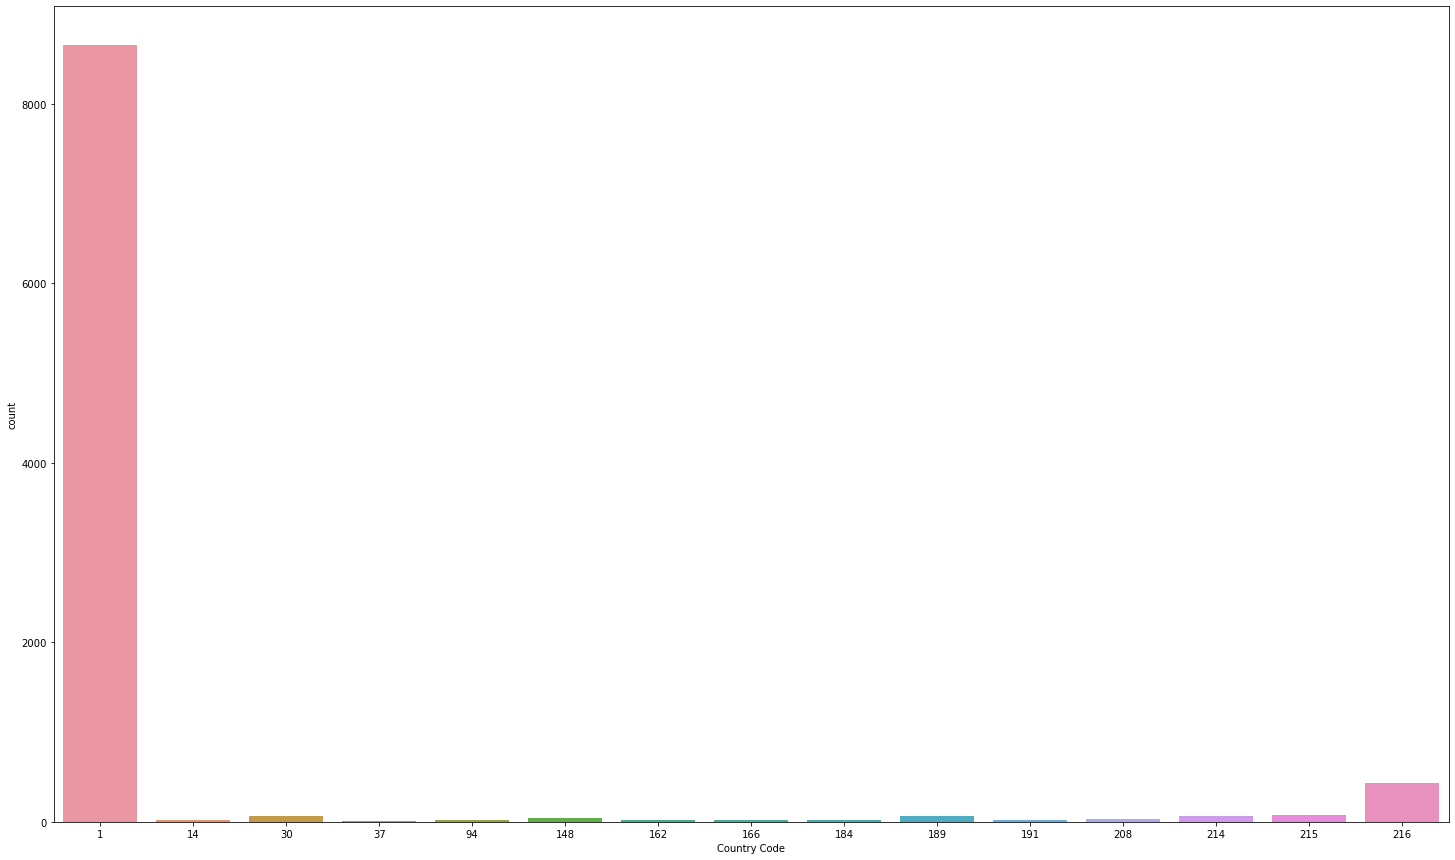

In [14]:
plt.figure(figsize =(25,15))
sns.countplot(Df["Country Code"])
Df["Country Code"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

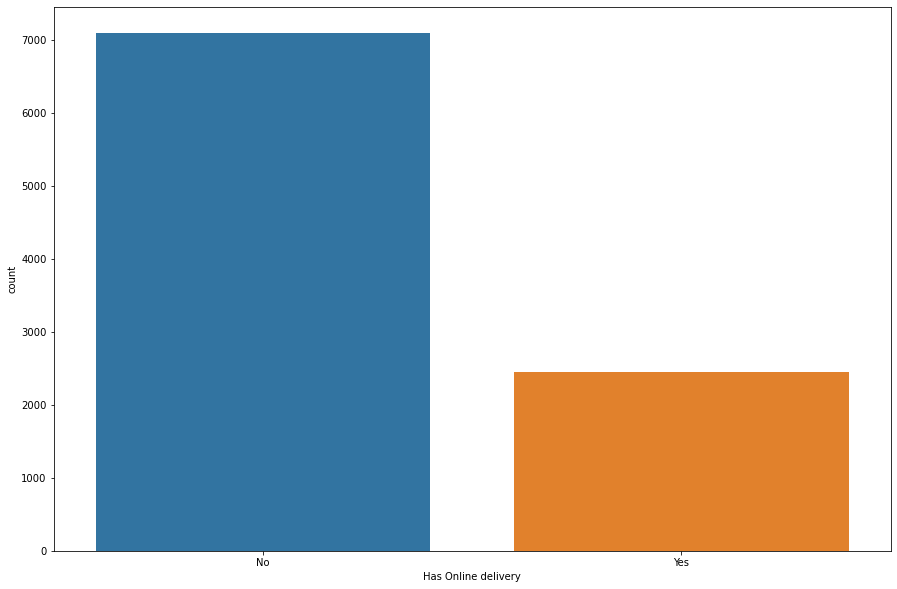

In [15]:
plt.figure(figsize =(15,10))
sns.countplot(Df["Has Online delivery"])
Df["Has Online delivery"].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

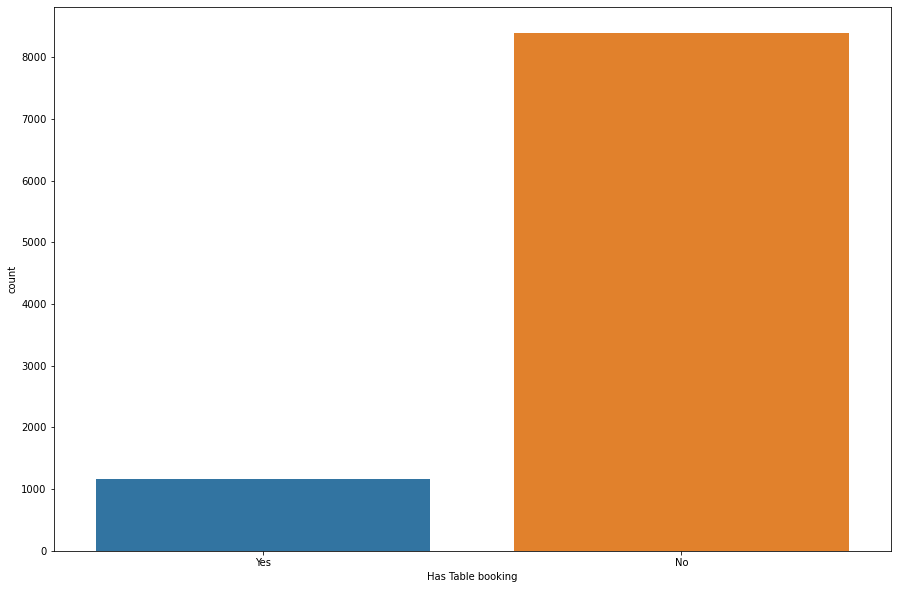

In [16]:
plt.figure(figsize =(15,10))
sns.countplot(Df["Has Table booking"])
Df["Has Table booking"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

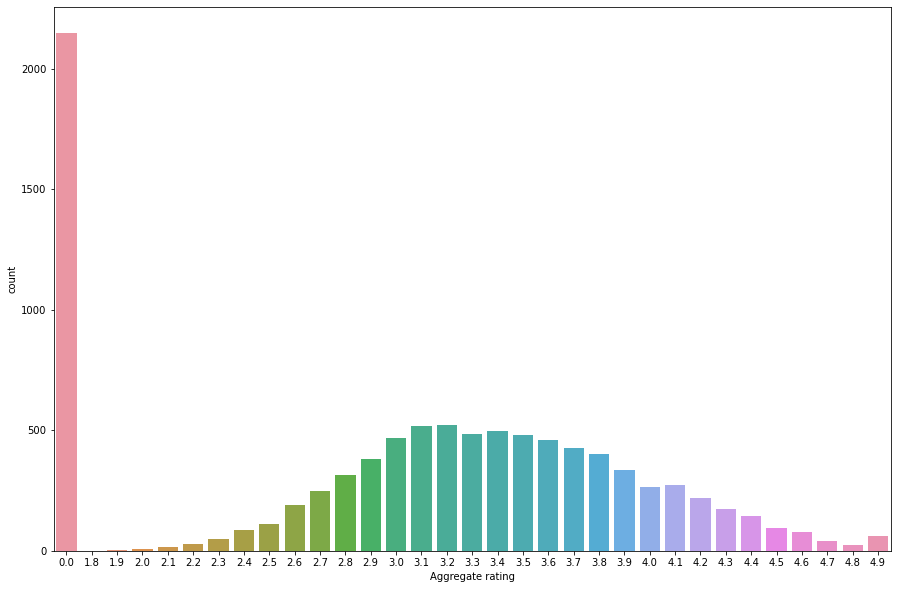

In [17]:
plt.figure(figsize =(15,10))
sns.countplot(Df["Aggregate rating"])
Df["Aggregate rating"].value_counts()

(array([  82.,  434.,   28.,   20.,   60., 8673.,   40.,  100.,   60.,
          54.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

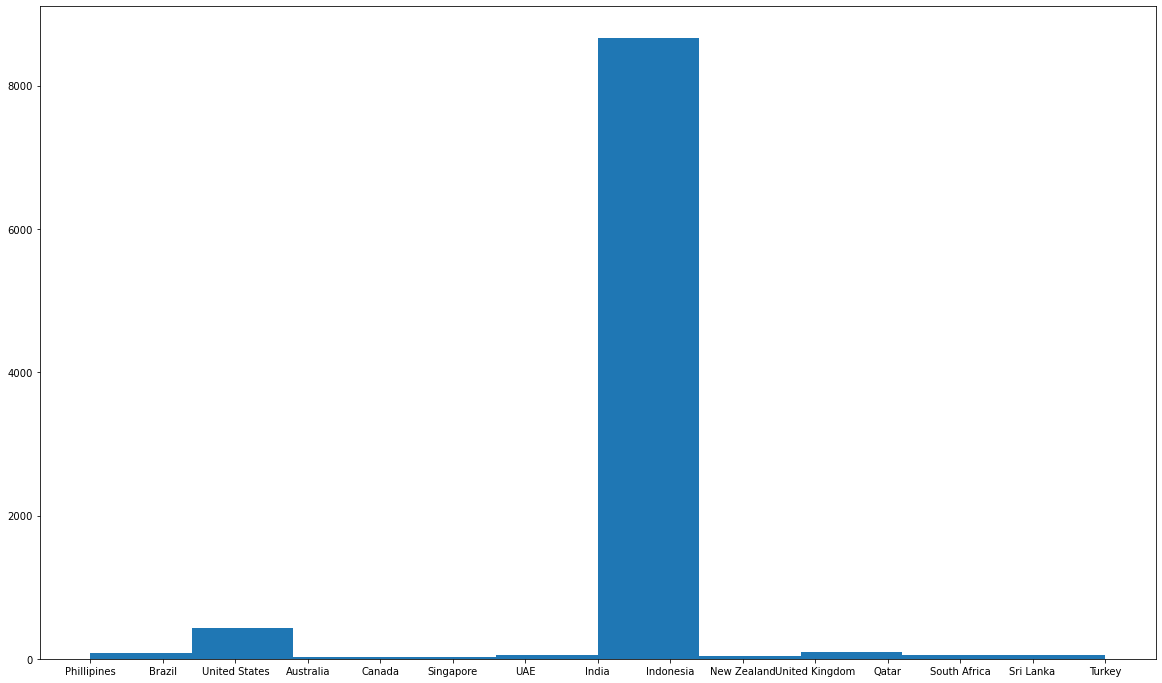

In [18]:
plt.figure(figsize =(20,12))
plt.hist(Df["Country"])

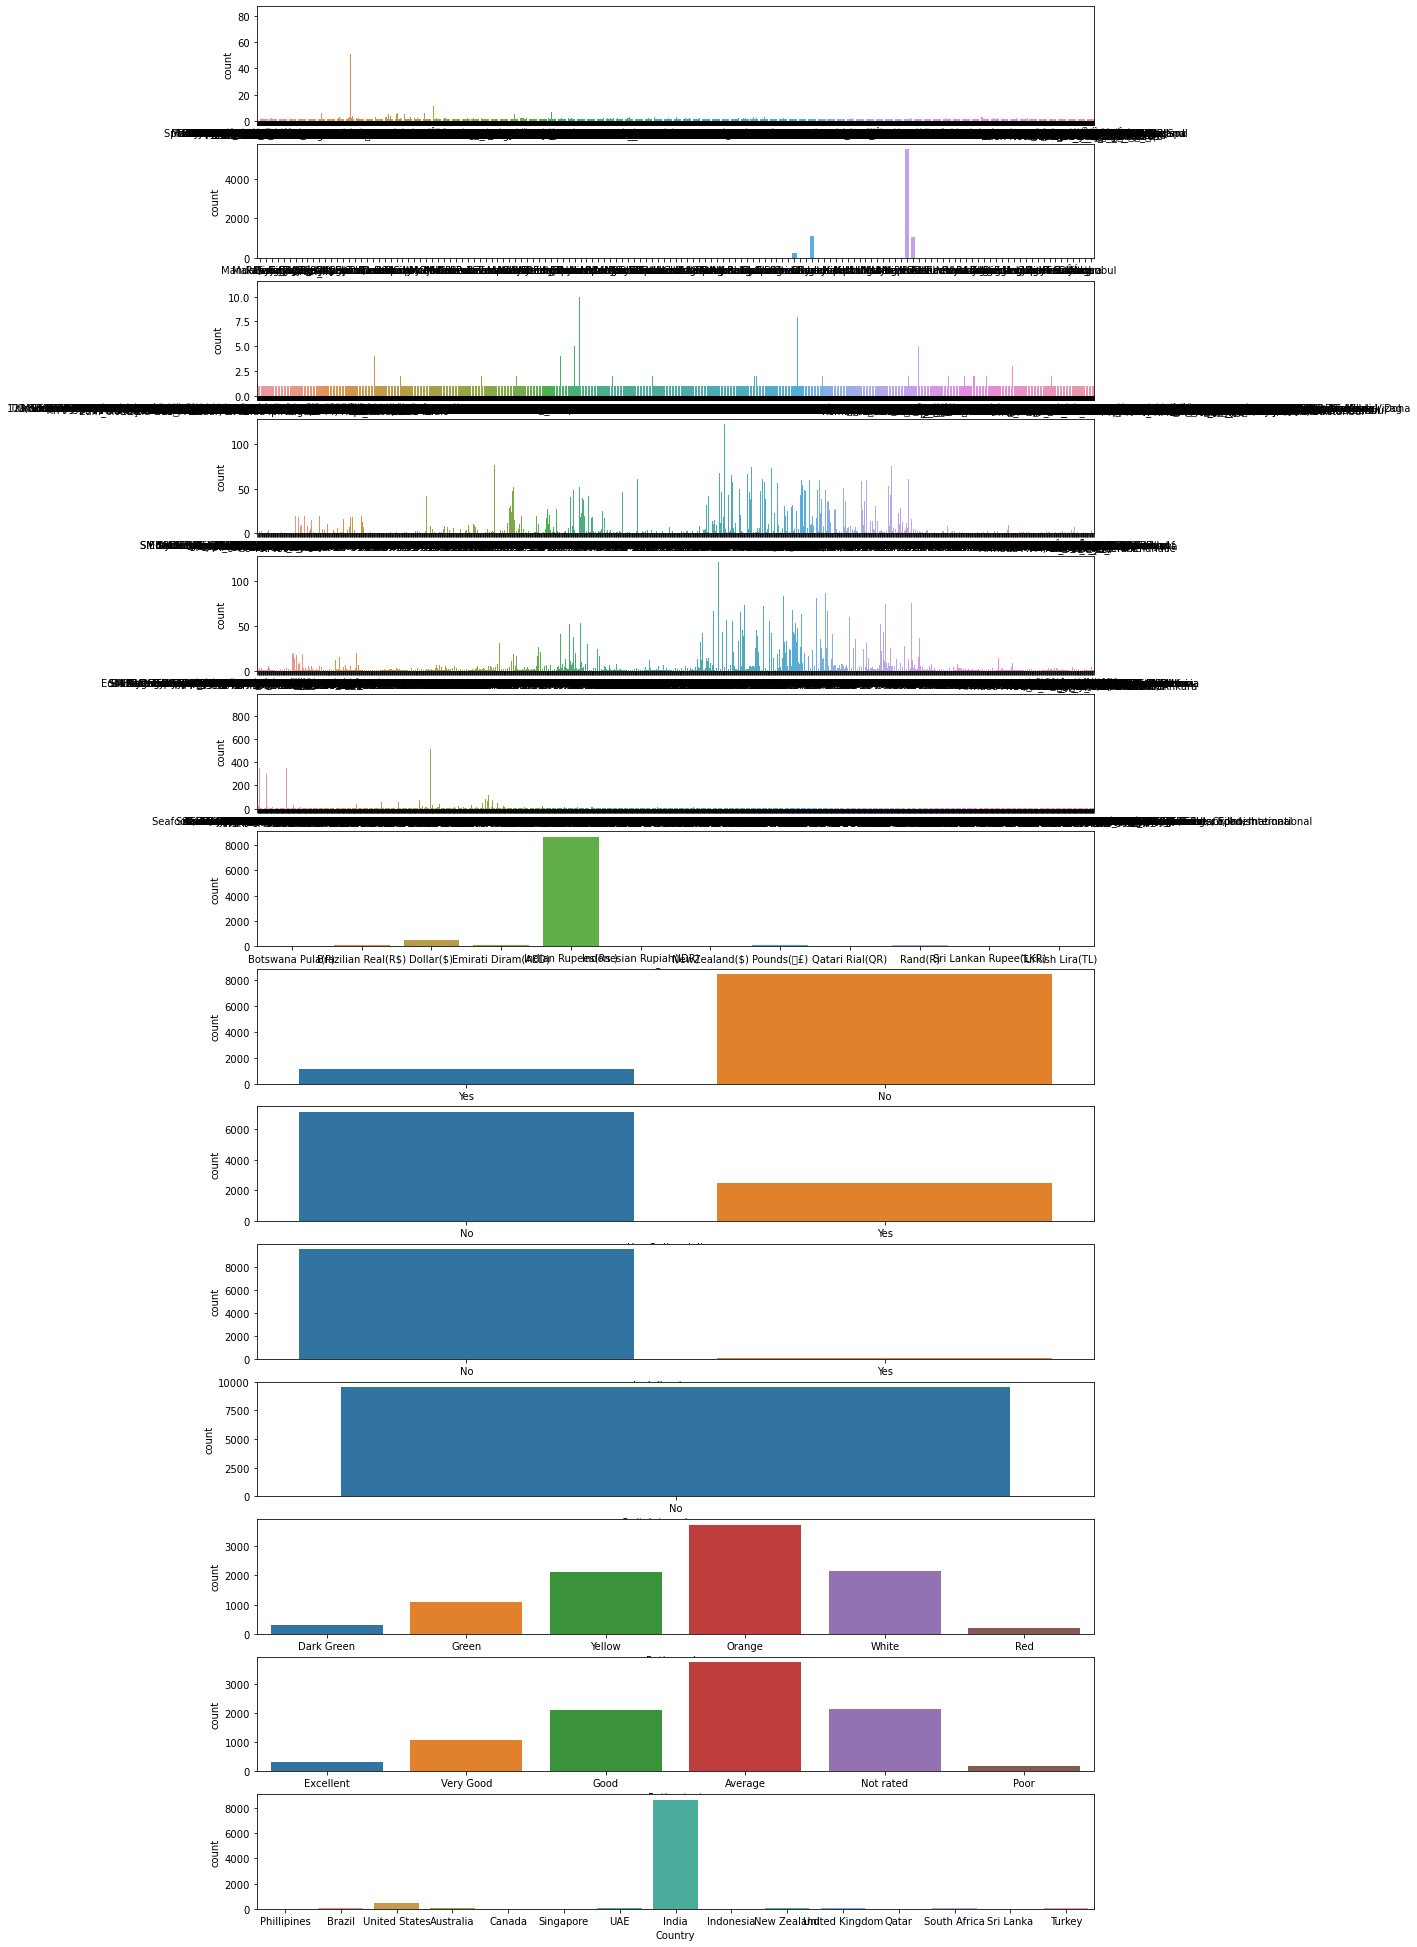

In [19]:
plt.figure(figsize=(15,35))
num = 1


for column in Df:
    if Df[column].dtypes == 'object':
        if num<=14:
            plt.subplot(14,1,num)
            sns.countplot(Df[column])

        num+=1
plt.show()

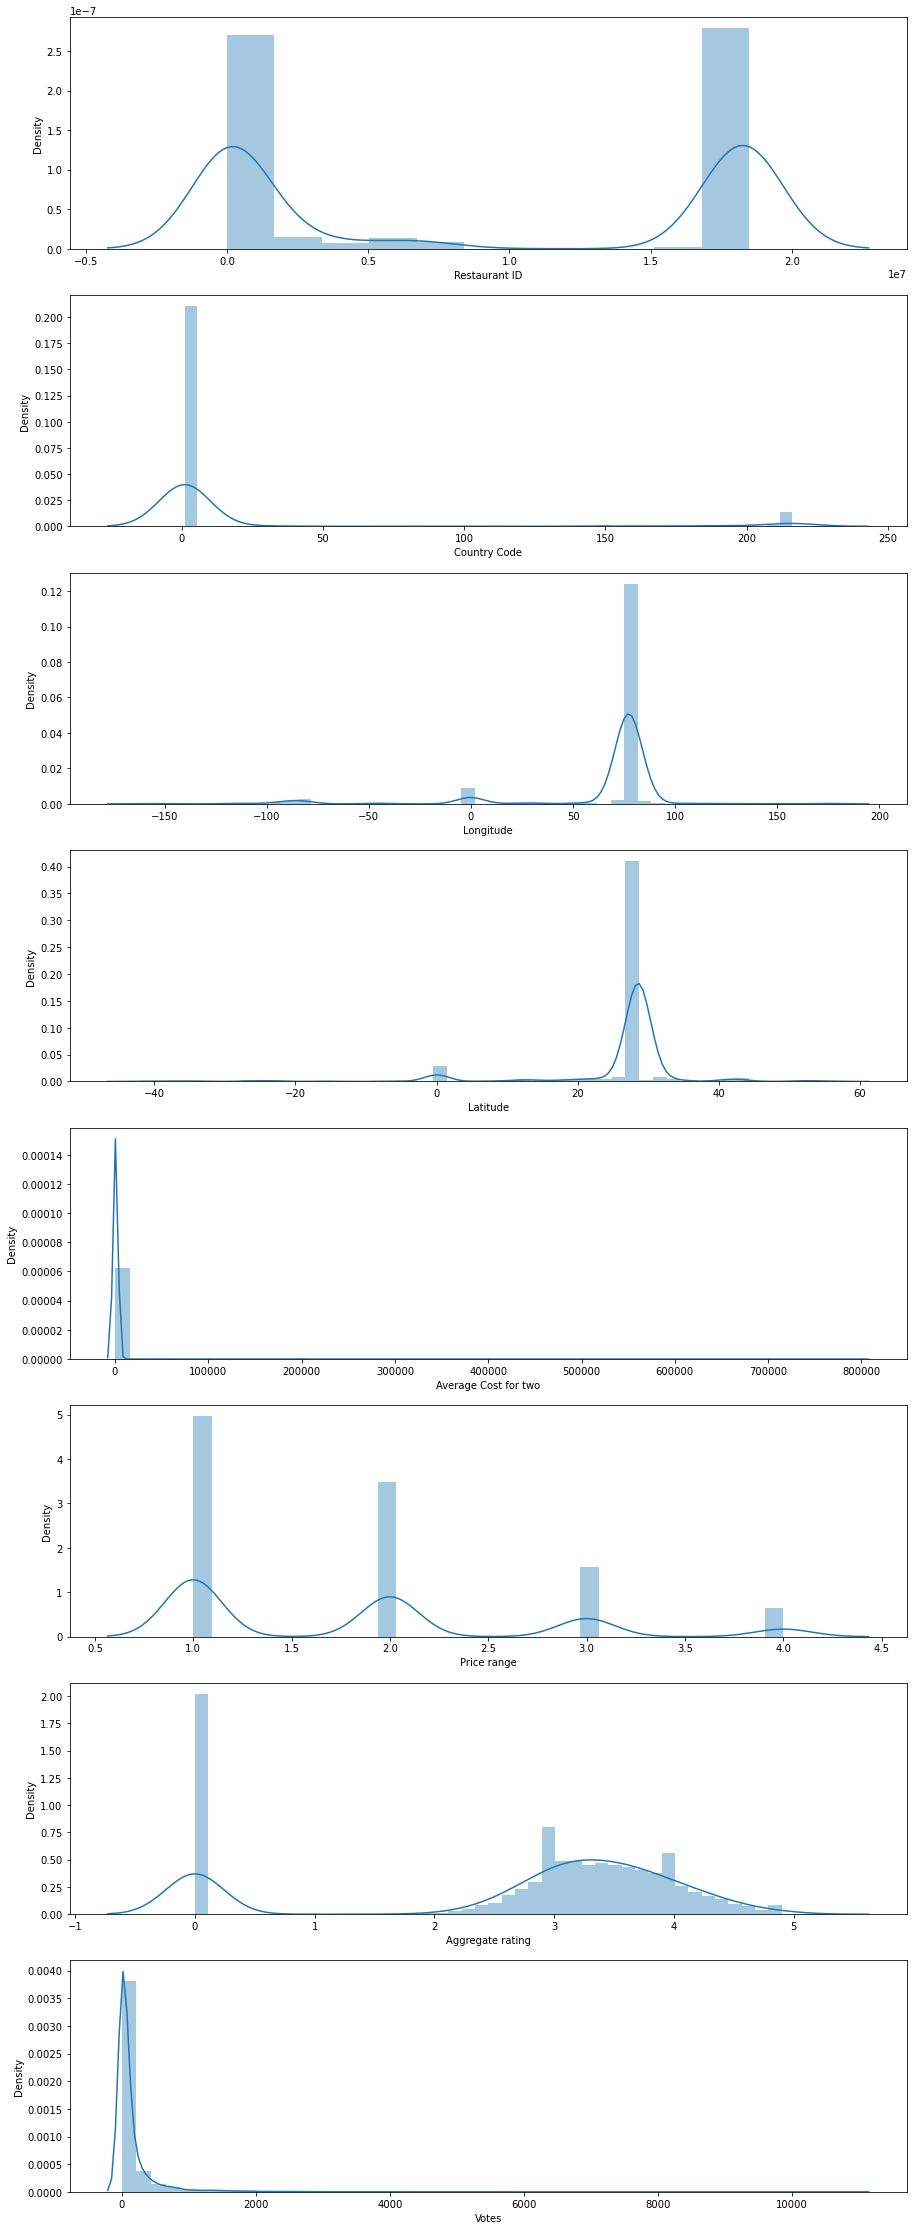

In [20]:
plt.subplots(figsize=(15, 40))
num = 1

for column in Df:
    if Df[column].dtype != "object" and Df[column].dtype != "str":
        if num <= 8:
            plt.subplot(8, 1, num)
            sns.distplot(Df[column])
            num += 1

plt.show()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

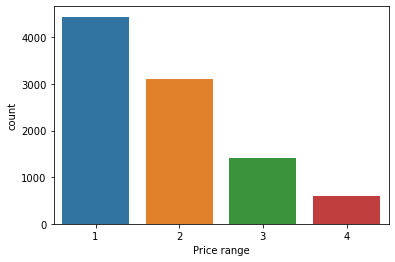

In [21]:
sns.countplot(Df["Price range"])
Df["Price range"].value_counts()

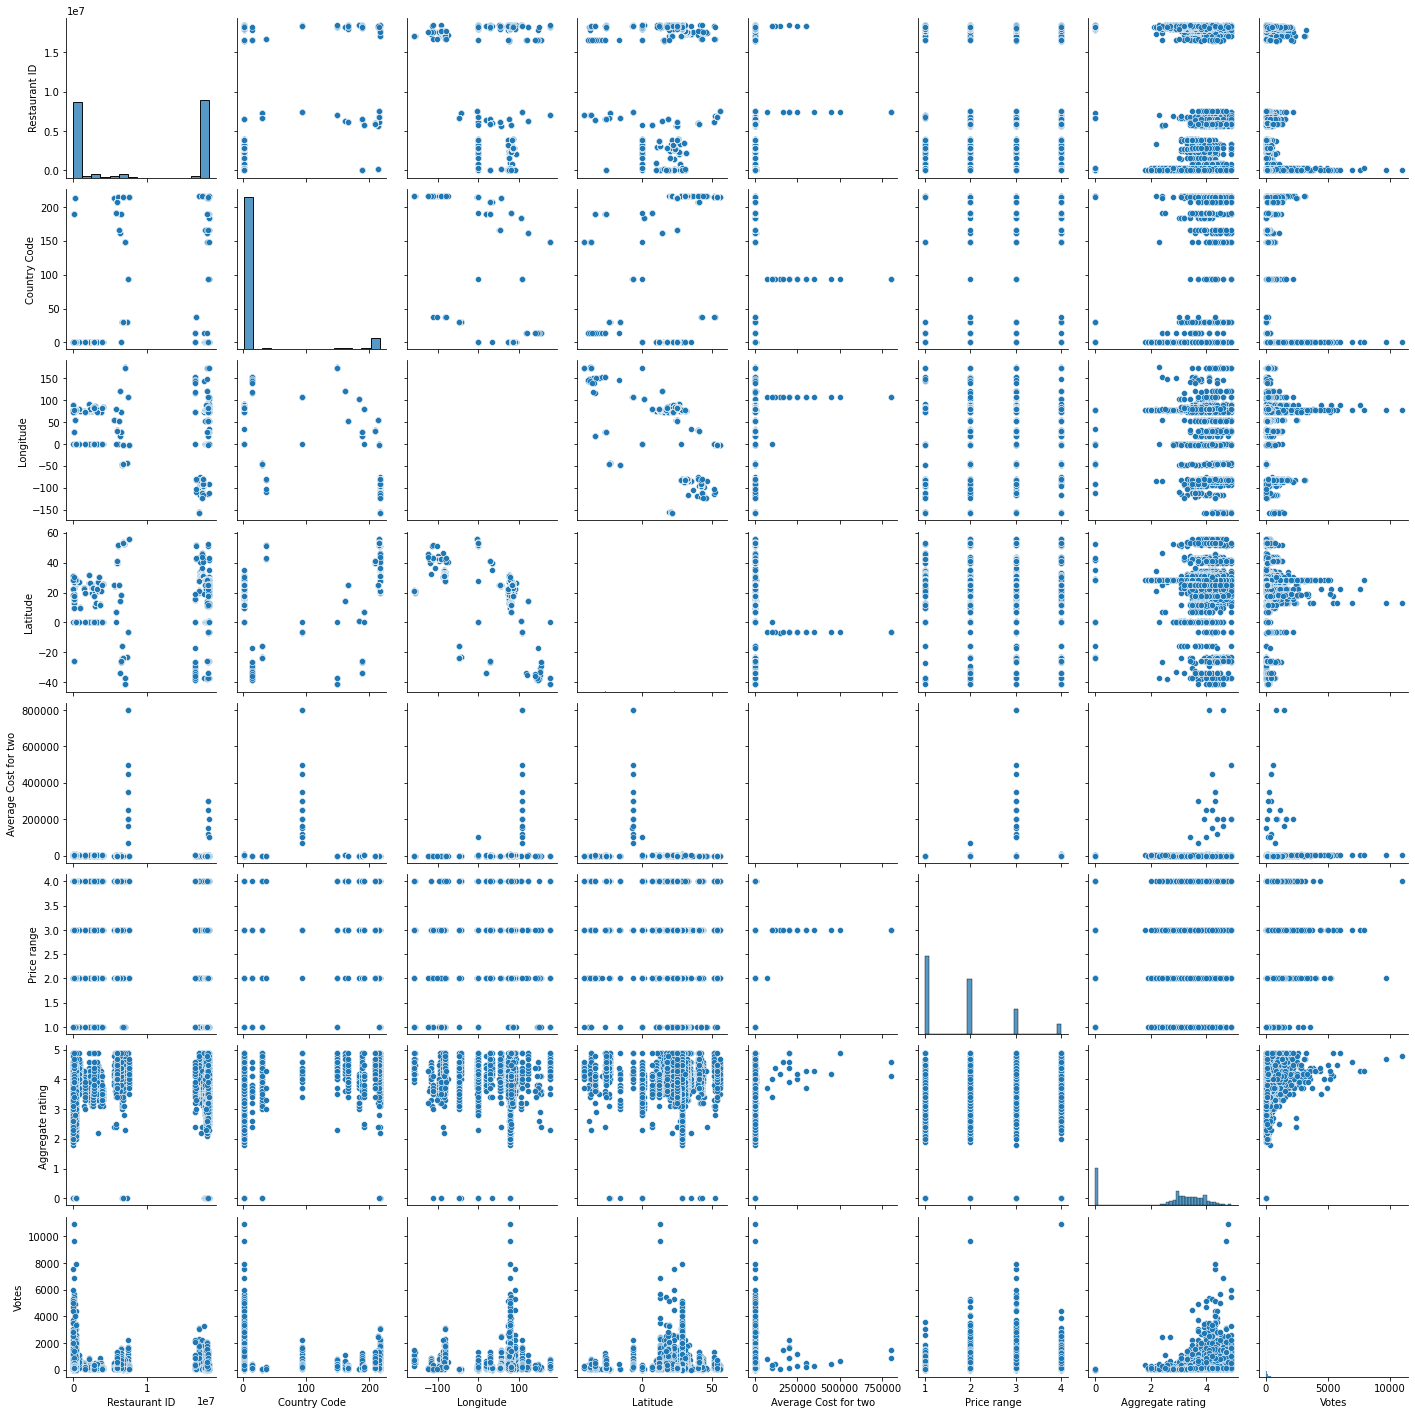

In [22]:
#checking relationn bet. each column.

sns.pairplot(Df)
plt.show()

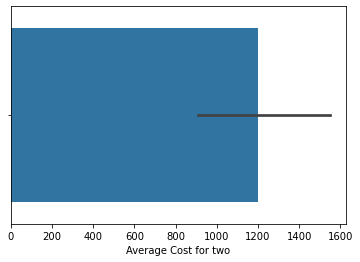

In [23]:
sns.barplot(Df["Average Cost for two"])
plt.show()

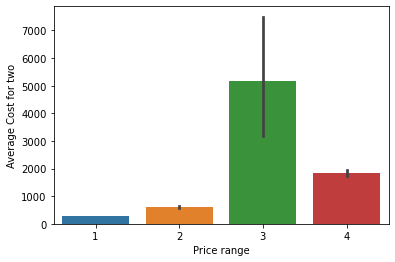

In [24]:
sns.barplot(Df['Price range'], y='Average Cost for two', data=Df)
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for col in Df.columns:
    Df[col] = Le.fit_transform(Df[col])
        
Df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,4824,3749,6,73,8685,171,172,8042,384,920,...,1,0,0,0,2,31,0,1,314,6
1,4814,3173,6,73,6055,593,601,8041,382,1111,...,1,0,0,0,2,28,0,1,545,6
2,4810,2897,6,75,4684,308,314,8053,388,1671,...,1,0,0,0,3,27,1,5,270,6
3,4827,4707,6,75,8690,862,875,8050,391,1126,...,0,0,0,0,3,32,0,1,362,6
4,4820,5523,6,75,8689,862,875,8055,390,1122,...,1,0,0,0,3,31,0,1,229,6


In [26]:
for i in Df.columns:
    print(f"Column: {i} = {Df[i].nunique()}")
    print('\n')
    print(f"Column: {i} = {Df[i].value_counts()}")
    print('\n')

Column: Restaurant ID = 9551


Column: Restaurant ID = 4824    1
6244    1
9117    1
6972    1
6973    1
       ..
4172    1
200     1
1452    1
140     1
4757    1
Name: Restaurant ID, Length: 9551, dtype: int64


Column: Restaurant Name = 7446


Column: Restaurant Name = 1099    83
2099    79
6106    63
2717    51
4077    48
        ..
4653     1
3264     1
3025     1
3001     1
7240     1
Name: Restaurant Name, Length: 7446, dtype: int64


Column: Country Code = 15


Column: Country Code = 0     8652
14     434
13      80
2       60
12      60
9       60
5       40
11      34
1       24
6       22
4       21
8       20
7       20
10      20
3        4
Name: Country Code, dtype: int64


Column: City = 141


Column: City = 88    5473
50    1118
89    1080
43     251
48      25
      ... 
53       1
93       1
46       1
45       1
25       1
Name: City, Length: 141, dtype: int64


Column: Address = 8918


Column: Address = 7486    11
4527    11
5312    10
8649     9
6935     8
       

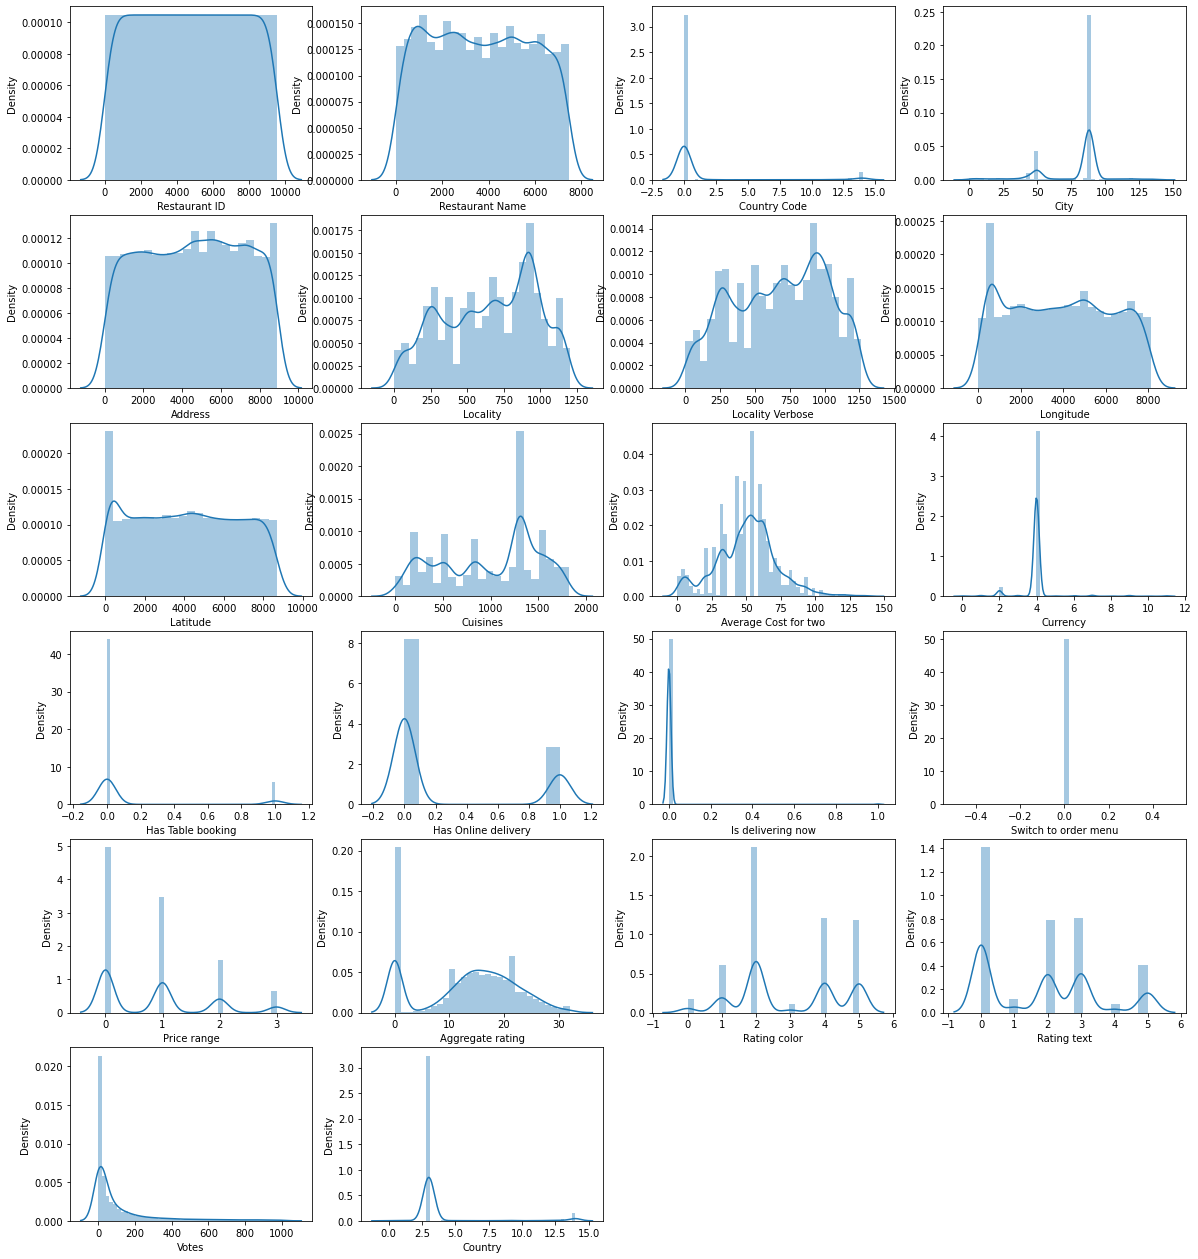

In [27]:
plt.subplots(figsize=(20, 30))
for i, column in enumerate(Df.columns):
    plt.subplot(8, 4, i + 1)
    sns.distplot(Df[column])
plt.show()


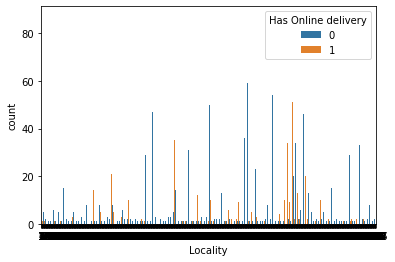

In [29]:
sns.countplot(x = "Locality", hue = "Has Online delivery", data=Df)
plt.show()

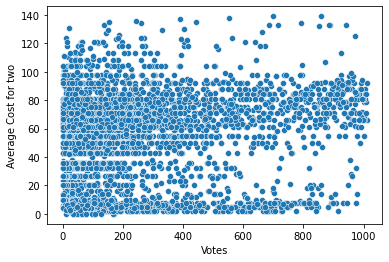

In [31]:
sns.scatterplot(x="Votes", y = "Average Cost for two", data = Df)
plt.show()

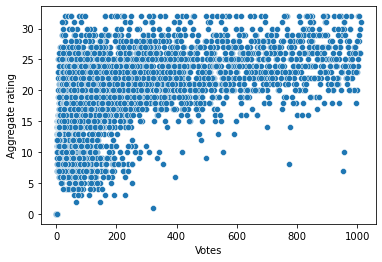

In [32]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=Df)
plt.show()

In [41]:
Df.drop(columns = ['Restaurant ID', 'Restaurant Name', 'Address', 'Longitude', 'Latitude', 'Switch to order menu'], axis =1)
#drop some column which are not required for futher analysis

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6,73,171,172,920,73,0,1,0,0,2,31,0,1,314,6
1,6,73,593,601,1111,75,0,1,0,0,2,28,0,1,545,6
2,6,75,308,314,1671,113,0,1,0,0,3,27,1,5,270,6
3,6,75,862,875,1126,81,0,0,0,0,3,32,0,1,362,6
4,6,75,862,875,1122,81,0,1,0,0,3,31,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,11,140,517,523,1813,16,11,0,0,0,2,24,1,5,663,11
9547,11,140,552,558,1824,21,11,0,0,0,2,25,1,5,755,11
9548,11,140,554,561,1110,29,11,0,0,0,3,20,5,2,585,11
9549,11,140,554,561,1657,23,11,0,0,0,3,23,1,5,714,11


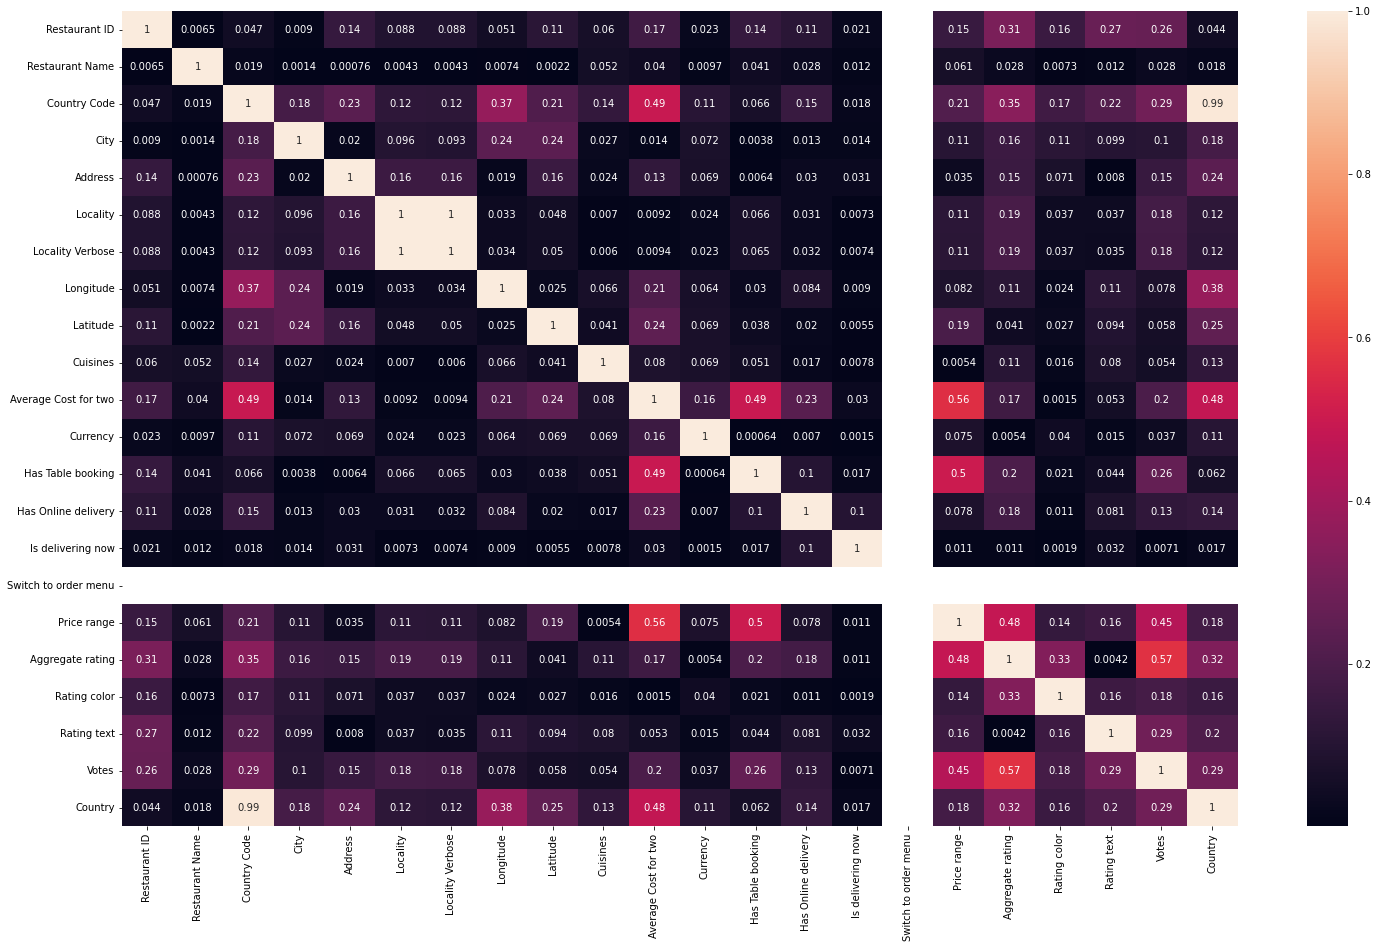

In [55]:
Df_corr=Df.corr().abs()
plt.figure(figsize=(25,15))
sns.heatmap(Df_corr, annot=True)
plt.show()

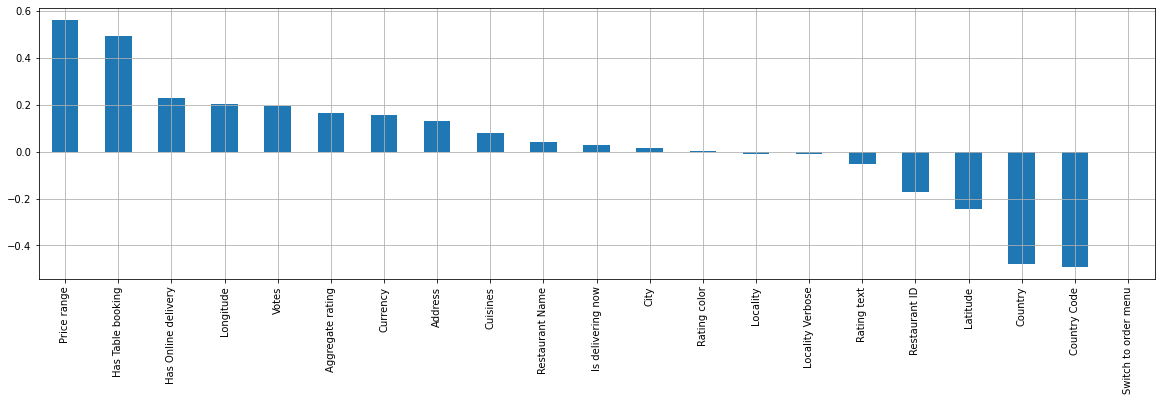

In [56]:
plt.figure(figsize=(20,5))
Df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar', grid=True)
plt.show()

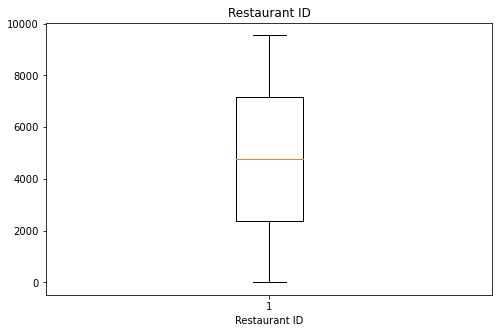

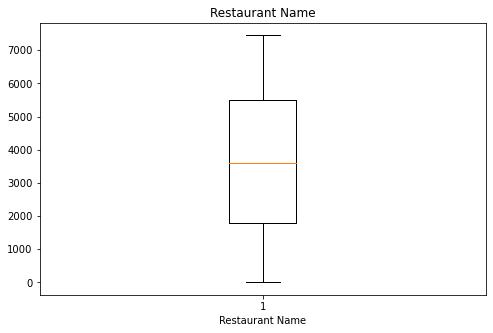

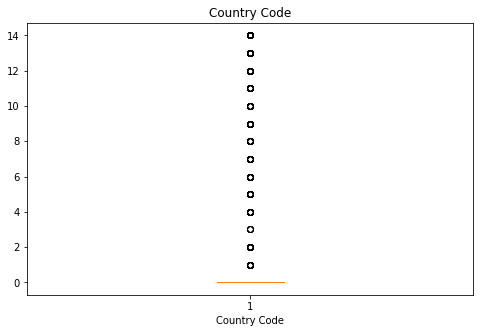

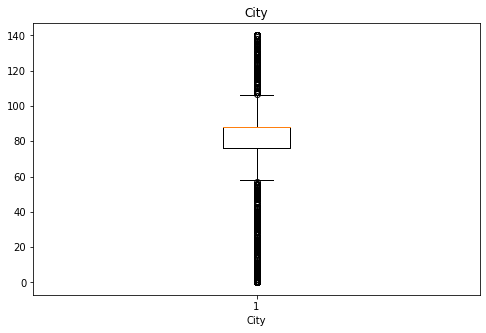

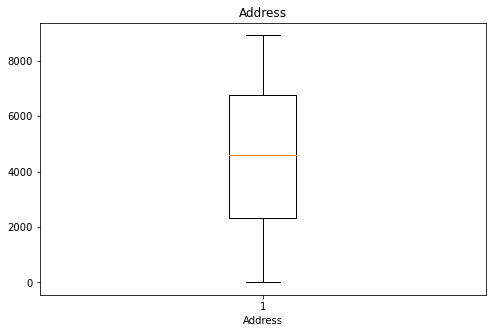

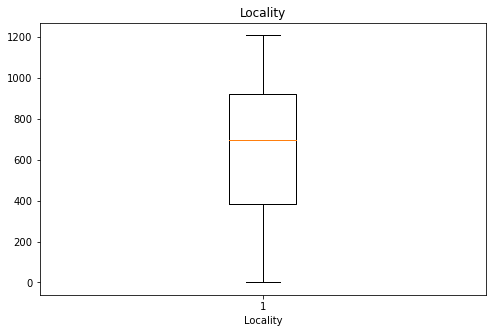

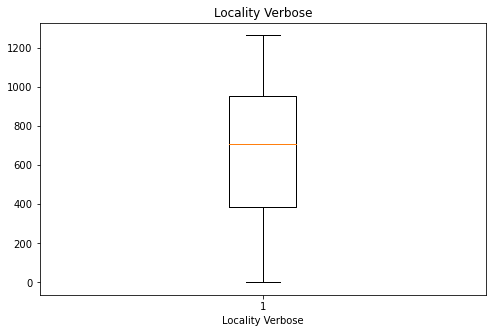

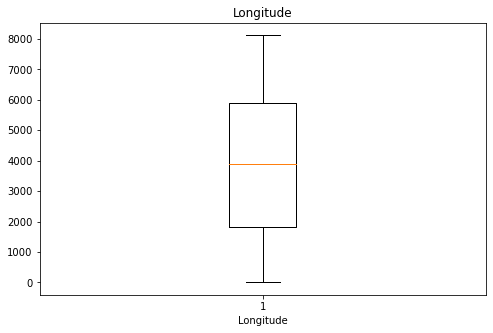

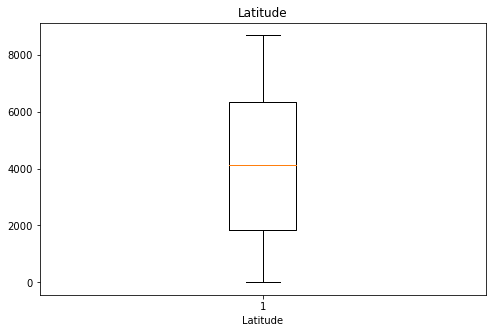

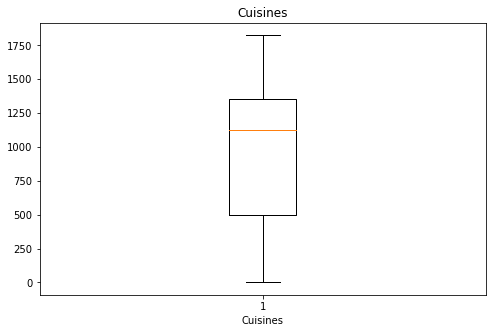

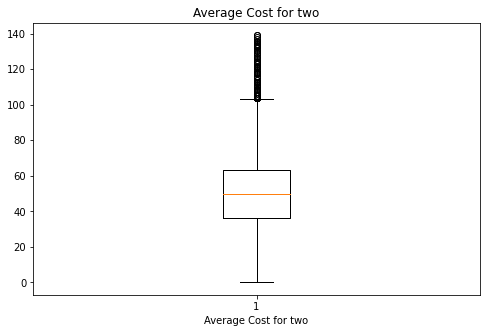

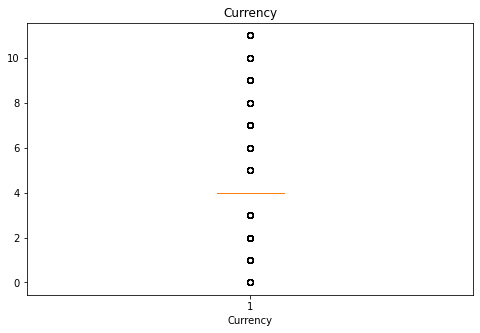

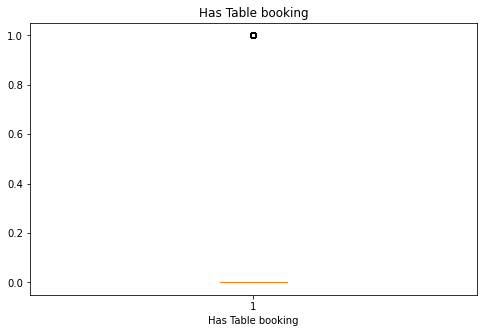

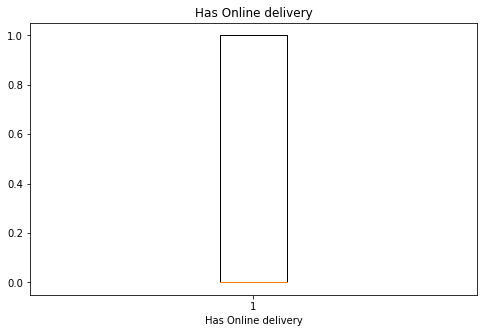

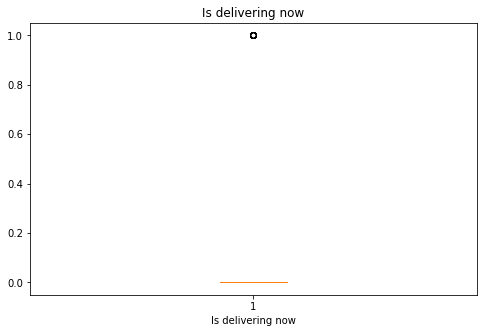

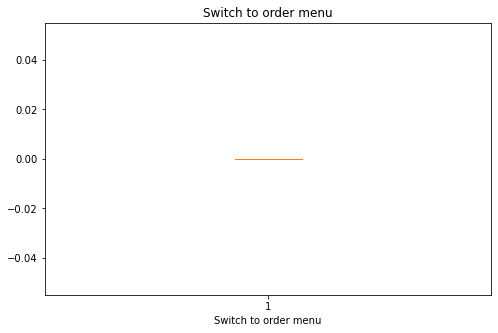

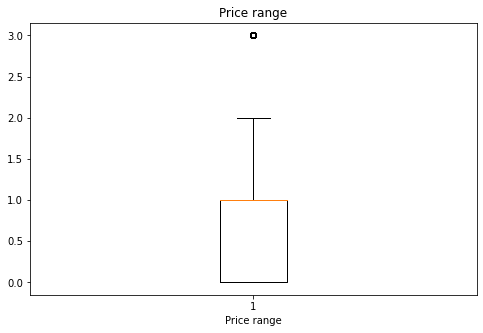

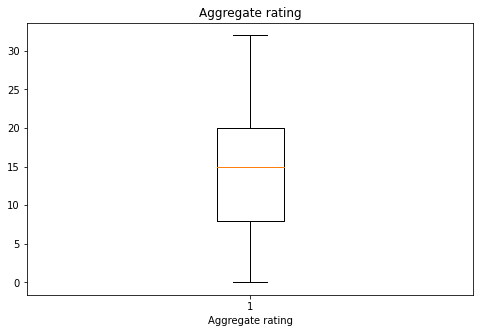

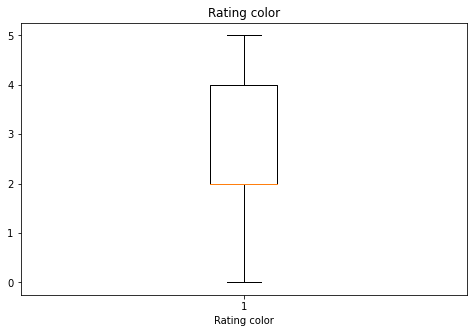

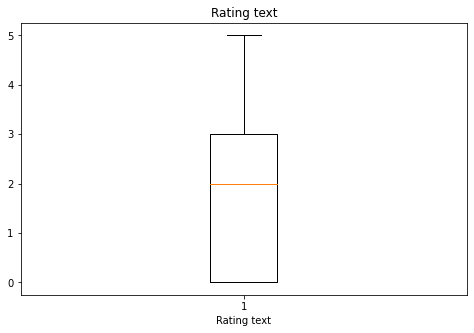

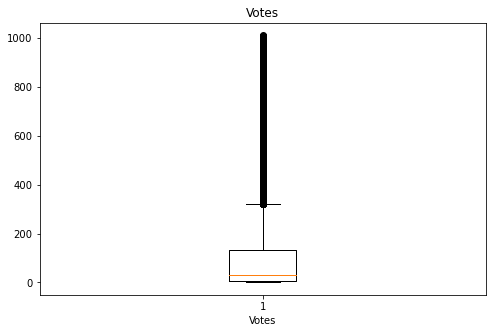

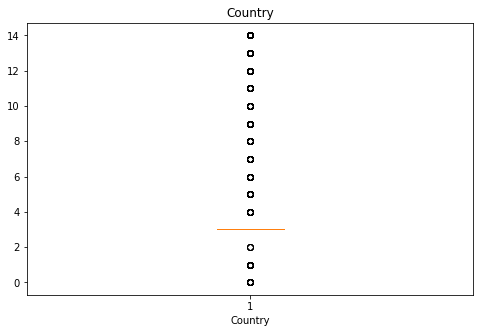

In [42]:
for j in Df.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(Df[j], vert=True)
    plt.title(j)
    plt.xlabel(j)
    plt.show()

In [43]:
columns = Df[["Country Code", "City", "Average Cost for two", "Currency", "Has Table booking", "Has Online delivery", "Is delivering now","Price range","Votes","Country",]]

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(columns))
np.where(z>3)

(array([   0,    1,    2, ..., 9548, 9549, 9550], dtype=int64),
 array([3, 3, 3, ..., 3, 3, 3], dtype=int64))

In [45]:
z

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Country
0,1.446760,0.228533,1.037973,4.351046,2.692181,0.587547,0.059771,1.319803,0.981865,0.853457
1,1.446760,0.228533,1.130217,4.351046,2.692181,0.587547,0.059771,1.319803,2.141345,0.853457
2,1.446760,0.142317,2.882852,4.351046,2.692181,0.587547,0.059771,2.424090,0.761011,0.853457
3,1.446760,0.142317,1.406949,4.351046,0.371446,0.587547,0.059771,2.424090,1.222796,0.853457
4,1.446760,0.142317,1.406949,4.351046,2.692181,0.587547,0.059771,2.424090,0.555216,0.853457
...,...,...,...,...,...,...,...,...,...,...
9546,2.901778,2.659685,1.590978,7.681415,0.371446,0.587547,0.059771,1.319803,2.733634,2.738952
9547,2.901778,2.659685,1.360368,7.681415,0.371446,0.587547,0.059771,1.319803,3.195418,2.738952
9548,2.901778,2.659685,0.991393,7.681415,0.371446,0.587547,0.059771,2.424090,2.342121,2.738952
9549,2.901778,2.659685,1.268125,7.681415,0.371446,0.587547,0.059771,2.424090,2.989623,2.738952


In [48]:
new_df =Df[(z<3).all(axis=1)]
new_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
517,5060,6320,1,12,2673,93,94,8035,74,1270,...,0,0,0,0,1,15,2,0,21,0
518,5052,967,1,15,6699,111,112,8070,49,1619,...,0,0,0,0,1,29,0,1,237,0
519,5070,6608,1,37,577,282,288,8079,79,620,...,0,0,0,0,0,19,5,2,29,0
520,5065,6431,1,41,396,302,308,8080,78,331,...,0,0,0,0,1,24,1,5,56,0
521,5068,2372,1,45,1866,328,334,8077,81,1793,...,0,0,0,0,2,18,5,2,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,4974,4144,5,137,865,1048,1101,8101,5,331,...,0,0,0,0,1,26,1,5,157,5
9333,4979,4677,5,137,851,1048,1101,8103,6,1195,...,0,0,0,0,3,25,1,5,146,5
9334,4978,7443,5,137,1920,1177,1234,8111,19,1113,...,0,0,0,0,3,20,5,2,131,5
9335,4982,1378,5,137,5656,1177,1234,8108,17,791,...,0,0,0,0,3,26,1,5,141,5


In [49]:
Df.shape

(9551, 22)

In [50]:
new_df.shape

(8338, 22)

In [51]:
dataloss=(9551-8338)/9551*100 
dataloss

12.700240812480368

In [63]:
Df.skew()

Restaurant ID            0.000000
Restaurant Name          0.044637
Country Code             3.225168
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude                0.050762
Latitude                 0.043785
Cuisines                -0.307425
Average Cost for two     0.089636
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                    2.445367
Country                  3.312721
dtype: float64

Starting with the Average cost for two predictions

In [58]:
X=new_df.drop("Average Cost for two",axis=1)
y=new_df["Average Cost for two"]

In [64]:
from sklearn.preprocessing import power_transform
Df=power_transform(X)

Df=pd.DataFrame(Df,columns=X.columns)

In [65]:
Df.skew()

Restaurant ID          -0.300947
Restaurant Name        -0.270193
Country Code            9.637585
City                    0.182399
Address                -0.317456
Locality               -0.301664
Locality Verbose       -0.275057
Longitude              -0.211426
Latitude               -0.314635
Cuisines               -0.370209
Currency                1.848125
Has Table booking       2.391837
Has Online delivery     1.017413
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.226059
Aggregate rating       -0.519227
Rating color           -0.069523
Rating text            -0.026207
Votes                  -0.019247
Country                 2.349329
dtype: float64

In [66]:
X.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
517,5060,6320,1,12,2673,93,94,8035,74,1270,...,0,0,0,0,1,15,2,0,21,0
518,5052,967,1,15,6699,111,112,8070,49,1619,...,0,0,0,0,1,29,0,1,237,0
519,5070,6608,1,37,577,282,288,8079,79,620,...,0,0,0,0,0,19,5,2,29,0
520,5065,6431,1,41,396,302,308,8080,78,331,...,0,0,0,0,1,24,1,5,56,0
521,5068,2372,1,45,1866,328,334,8077,81,1793,...,0,0,0,0,2,18,5,2,37,0


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scl= StandardScaler()
scaled_x = scl.fit_transform(X)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [73]:
Lr = LinearRegression()

max_accuracy = 0
max_random = 0

for i in range(0,500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    Lr.fit(X_train,y_train)
    predict =Lr.predict(X_test)
    
    R2_score = r2_score(y_test,predict)
    if R2_score>max_accuracy:
        max_accuracy=R2_score
        max_random = i
        
print("R2 Score is - ", max_accuracy, "at the random state", max_random )

R2 Score is -  0.8140783792110757 at the random state 368


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=368)

In [75]:
Lr.fit(X_train, y_train)
predict = Lr.predict(X_test)
print(r2_score(y_test, predict))
print(mean_absolute_error(y_test,predict))
print(mean_squared_error(y_test,predict))

0.8140783792110757
6.292339927740816
60.3731440823344


In [76]:
from sklearn.model_selection import cross_val_score

for c in range(2,10):
    CV=cross_val_score(Lr,X,y,cv=c)
    cv_mean=CV.mean()
    print(f'At cross fold {c} the cv score is {cv_mean}')
    print('\n')

At cross fold 2 the cv score is 0.6960368176298657


At cross fold 3 the cv score is 0.6375843411462442


At cross fold 4 the cv score is 0.638327615902619


At cross fold 5 the cv score is 0.5803547499859638


At cross fold 6 the cv score is 0.5820954821789731


At cross fold 7 the cv score is 0.556444139177016


At cross fold 8 the cv score is 0.5492762353163572


At cross fold 9 the cv score is 0.5373798614048266




In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [78]:
model = [DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [79]:
for M in model:
    print("Accuracy of a Model   :", M)
    M.fit(X_train,y_train)
    predict_model = M.predict(X_test)
    print("R2 score     :", r2_score(y_test,predict_model))
    
    print("MAE   :", mean_absolute_error(y_test,predict_model))
    
    print("MSE    :", mean_squared_error(y_test,predict_model))
    
    model_score = cross_val_score(M,X,y, cv=4).mean()
    print("CV Score is    :", model_score)
    print("-----------------------------------------------------------------------------")

Accuracy of a Model   : DecisionTreeRegressor()
R2 score     : 0.7575894731556658
MAE   : 6.137290167865707
MSE    : 78.71642685851319
CV Score is    : 0.6636832478281552
-----------------------------------------------------------------------------
Accuracy of a Model   : RandomForestRegressor()
R2 score     : 0.869928230418012
MAE   : 4.964598321342925
MSE    : 42.23737751798562
CV Score is    : 0.8087789850954015
-----------------------------------------------------------------------------
Accuracy of a Model   : KNeighborsRegressor()
R2 score     : 0.10930257438574476
MAE   : 13.219904076738612
MSE    : 289.23050359712227
CV Score is    : -0.0966704780639222
-----------------------------------------------------------------------------


As a result of these scores, RandomForestRegressor() has the highest CV score indicating that it performs well in generalization. Additionally, its R2 score is relatively high which indicates a good fit for the data.

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
Rf = RandomForestRegressor()
parameter_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(RandomForestRegressor(), parameter_grid, cv=4)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [83]:
Model_fn =RandomForestRegressor(n_estimators= 300, max_depth = None , min_samples_split= 5 ,min_samples_leaf= 1)
Model_fn.fit(X_train,y_train)
predict_m =Model_fn.predict(X_test)
print(r2_score(y_test,predict_m)*100)

87.23935498795771


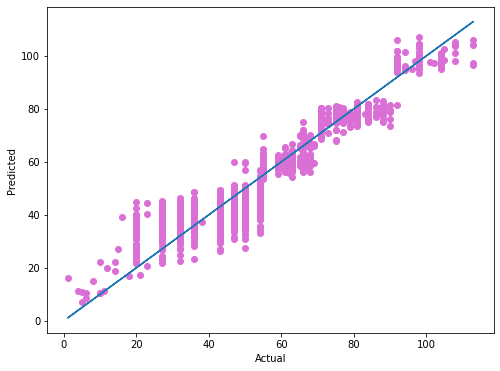

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predict_m, c='orchid')
plt.plot(y_test,y_test)
plt.xlabel('Actual',fontsize=10)
plt.ylabel('Predicted',fontsize=10)
plt.show()

In [85]:
import joblib
joblib.dump(Model_fn, "Zomato_Restaurant_Average_Prediction.pkl")

['Zomato_Restaurant_Average_Prediction.pkl']

In [87]:
new_Rf_model = joblib.load(open("Zomato_Restaurant_Average_Prediction.pkl",'rb'))
result1=new_Rf_model.score(X_test,y_test)
print(result1*100)

87.23935498795771


In [88]:
Prediction1 = pd.DataFrame([new_Rf_model.predict(X_test)[:],predict_m[:]],index=['Predicted','Original'])
Prediction1

,0,1,2,3,4,5,6,7,8,9,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
Predicted,60.869034,38.697988,56.893783,57.123064,42.327446,38.281254,45.496562,60.106862,62.011527,75.910345,...,60.005367,47.930812,76.905403,75.071679,76.936193,60.820871,30.081061,30.671906,59.904051,60.641393
Original,60.869034,38.697988,56.893783,57.123064,42.327446,38.281254,45.496562,60.106862,62.011527,75.910345,...,60.005367,47.930812,76.905403,75.071679,76.936193,60.820871,30.081061,30.671906,59.904051,60.641393


Now, work with Price range 

In [89]:
X = new_df.drop('Price range',axis=1)
y = new_df['Price range']

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sclr= StandardScaler()
scaled_X = sclr.fit_transform(X)

In [92]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)

1    4269
0    4269
2    4269
3    4269
Name: Price range, dtype: int64

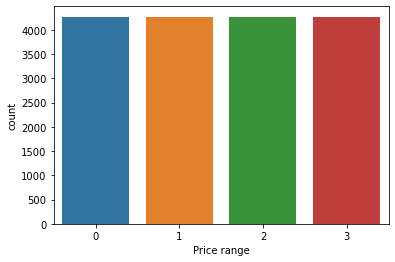

In [93]:
sns.countplot(y)
y.value_counts()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
LR = LogisticRegression()

max_accuracy = 0
max_random = 0

for i in range(0,300):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    LR.fit(X_train,y_train)
    
    predict_Lr =LR.predict(X_test)
    accu = accuracy_score(y_test,predict_Lr)
    if accu>max_accuracy:
        max_accuracy=accu
        max_random = i
print("The best test acuuracy is - ", max_accuracy, "at the random state", max_random )

The best test acuuracy is -  0.4970725995316159 at the random state 269


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=269)

In [97]:
LR.fit(X_train, y_train)
predict = LR.predict(X_test)
print("Accuracy score     :", accuracy_score(y_test, predict))
print("Confusion matrix   :",confusion_matrix(y_test,predict))
print("Classification report    :", classification_report(y_test,predict))

Accuracy score     : 0.4970725995316159
Confusion matrix   : [[659 121  31  52]
 [345 249 107 142]
 [122 111 428 225]
 [148 115 199 362]]
Classification report    :               precision    recall  f1-score   support

           0       0.52      0.76      0.62       863
           1       0.42      0.30      0.35       843
           2       0.56      0.48      0.52       886
           3       0.46      0.44      0.45       824

    accuracy                           0.50      3416
   macro avg       0.49      0.50      0.48      3416
weighted avg       0.49      0.50      0.48      3416



In [98]:
from sklearn.model_selection import cross_val_score

for C in range(2,10):
    CV=cross_val_score(LR,X,y,cv=C)
    cv_mean=CV.mean()
    print(f'At cross fold {C} the cv score is {cv_mean}')
    print('\n')

At cross fold 2 the cv score is 0.40050363082689155


At cross fold 3 the cv score is 0.42427969079409705


At cross fold 4 the cv score is 0.43798313422347157


At cross fold 5 the cv score is 0.44161762235076685


At cross fold 6 the cv score is 0.4335324431951277


At cross fold 7 the cv score is 0.4453679138664923


At cross fold 8 the cv score is 0.4533338619298565


At cross fold 9 the cv score is 0.4542124233525942




In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
MODEL = [RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(),GradientBoostingClassifier()]         

In [101]:
for m in MODEL:
    print("Accuracy of a Model   :", m)
    m.fit(X_train,y_train)
    predict_mod = m.predict(X_test)
    print("Accuracy score     :", accuracy_score(y_test,predict_mod))
    
    print("Confusion matrix   :", confusion_matrix(y_test,predict_mod))
    
    print("Classification report    :", classification_report(y_test,predict_mod))
    
    model_score = cross_val_score(m,X,y, cv=5).mean()
    print("CV Score is    :", model_score)
    print("-----------------------------------------------------------------------------")


Accuracy of a Model   : RandomForestClassifier()
Accuracy score     : 0.8413348946135831
Confusion matrix   : [[694 148  16   5]
 [163 580  87  13]
 [  9  37 801  39]
 [  3   3  19 799]]
Classification report    :               precision    recall  f1-score   support

           0       0.80      0.80      0.80       863
           1       0.76      0.69      0.72       843
           2       0.87      0.90      0.89       886
           3       0.93      0.97      0.95       824

    accuracy                           0.84      3416
   macro avg       0.84      0.84      0.84      3416
weighted avg       0.84      0.84      0.84      3416

CV Score is    : 0.6572372197324793
-----------------------------------------------------------------------------
Accuracy of a Model   : KNeighborsClassifier()
Accuracy score     : 0.7057962529274004
Confusion matrix   : [[399 284 127  53]
 [193 447 142  61]
 [ 33  38 766  49]
 [  5   3  17 799]]
Classification report    :               precision  

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'n_estimators': [13, 14, 15],'max_depth': [None, 5, 10, 15],'criterion':['entropy','gini'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
RF = RandomForestClassifier()


In [104]:
GCV = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 14}

In [106]:
GCV_predict_RF = GCV.best_estimator_.predict(X_test)
print(accuracy_score(y_test,GCV_predict_RF))
print("                                          ")
print(confusion_matrix(y_test,GCV_predict_RF))
print("                                          ")
print(classification_report(y_test,GCV_predict_RF))

0.8152810304449649
                                          
[[692 149  19   3]
 [201 551  81  10]
 [ 14  55 771  46]
 [  5   8  40 771]]
                                          
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       863
           1       0.72      0.65      0.69       843
           2       0.85      0.87      0.86       886
           3       0.93      0.94      0.93       824

    accuracy                           0.82      3416
   macro avg       0.81      0.82      0.81      3416
weighted avg       0.81      0.82      0.81      3416



In [108]:
Final_model =RandomForestClassifier(n_estimators= 14, criterion = 'entropy', max_depth = None , min_samples_split= 2 ,min_samples_leaf= 1)
Final_model.fit(X_train,y_train)
predict_M =Final_model.predict(X_test)
print(accuracy_score(y_test,predict_M)*100)

81.11826697892272


In [109]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [110]:
matrix = confusion_matrix(y_test, predict_M)

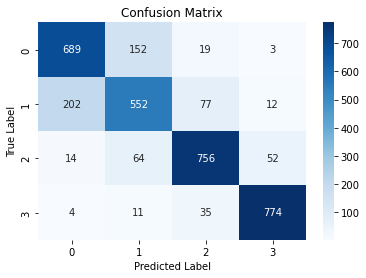

In [111]:
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Text(0.5, 1.0, 'ROC Curve')

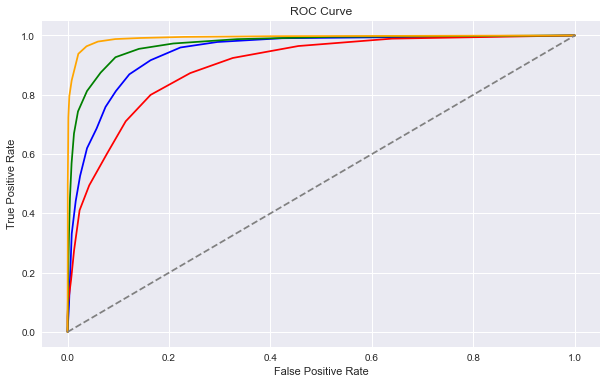

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3])

y_scores = Final_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange']
for i in range(y_test_binary.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc = roc_auc_score(y_test_binary[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [114]:
import joblib
joblib.dump(Final_model, "Zomato_Restaurant_Price_Prediction.pkl")

['Zomato_Restaurant_Price_Prediction.pkl']

In [115]:
New_RF_model = joblib.load(open("Zomato_Restaurant_Price_Prediction.pkl",'rb'))
result1=New_RF_model.score(X_test,y_test)
print(result1*100)

81.11826697892272


In [116]:
Prediction2 = pd.DataFrame([New_RF_model.predict(X_test)[:],predict_M[:]],index=['Predicted','Original'])
Prediction2

,0,1,2,3,4,5,6,7,8,9,...,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415
Predicted,1,0,3,1,0,3,3,2,3,3,...,1,0,0,2,1,2,2,2,0,2
Original,1,0,3,1,0,3,3,2,3,3,...,1,0,0,2,1,2,2,2,0,2
